In [16]:
import h5py as h5
import os
import matplotlib.pyplot as plt
from probabalistic_displacement_scripts import get_exceedance_bar_chart_data
import numpy as np
import pandas as pd

# os.chdir(os.path.dirname(os.path.abspath(__file__)))
results_dir = os.path.join('..', 'results', 'fq_hikkerm')

h5_file = os.path.join(results_dir, 'weighted_mean_PPE_dict_uniform.h5')


time_interval = [5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 115, 125, 150]

probabilities = [2, 10, 33, 50, 67]  # Probability that the displacement will exceed

interseismic_vlm = 0 # mm/yr
interseismic_uc = 1

site_list = os.path.join('..', 'sites', 'JDE_sites.csv')
site_list = list(pd.read_csv(site_list)['siteId'])

PPEh5 = h5.File(h5_file, 'r')

sigma_lims = PPEh5['sigma_lims'][:]
error_ix = [ix for ix in range(len(sigma_lims))]

exceed_type = 'down'

ups = np.zeros((len(probabilities), len(time_interval), len(site_list)))
downs = np.zeros((len(probabilities), len(time_interval), len(site_list)))

In [17]:
time_interval = np.array(time_interval)
for pix, probability in enumerate(probabilities):
    for tix, interval in enumerate(time_interval):
        ups[pix, tix, :] = get_exceedance_bar_chart_data(site_PPE_dictionary=PPEh5, exceed_type='up', site_list=site_list, probability=probability / 100, weighted=True, interval=str(interval))
        downs[pix, tix, :] = get_exceedance_bar_chart_data(site_PPE_dictionary=PPEh5, exceed_type='down', site_list=site_list, probability=probability / 100, weighted=True, interval=str(interval))
PPEh5.close()

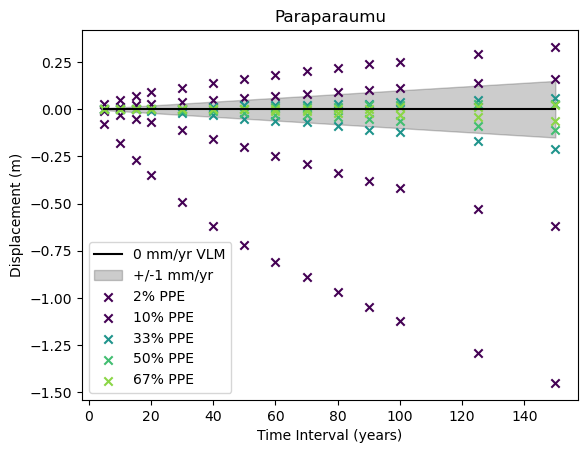

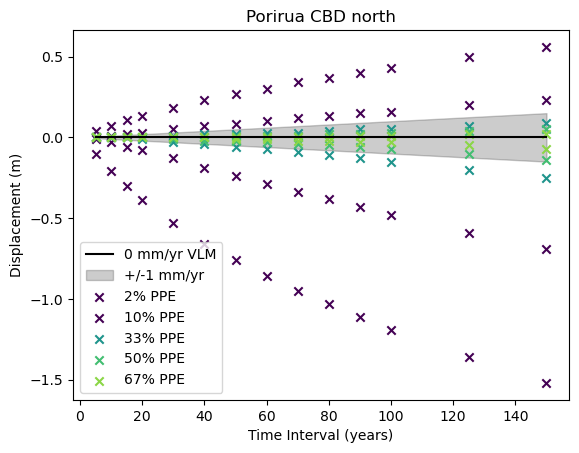

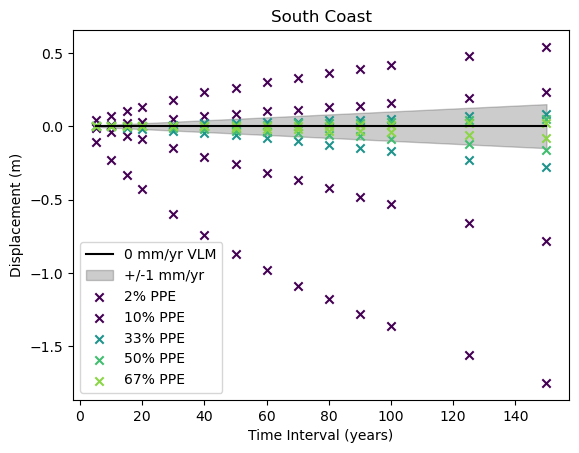

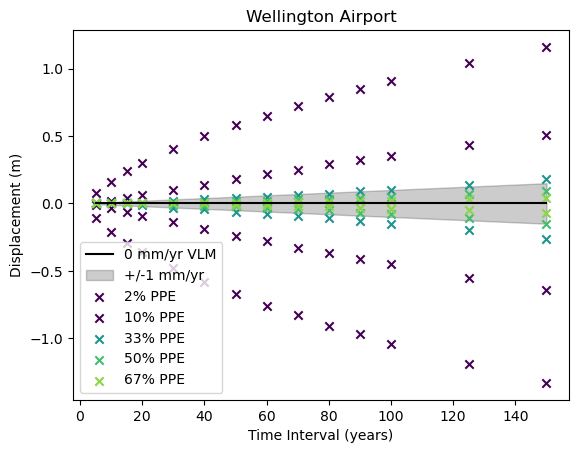

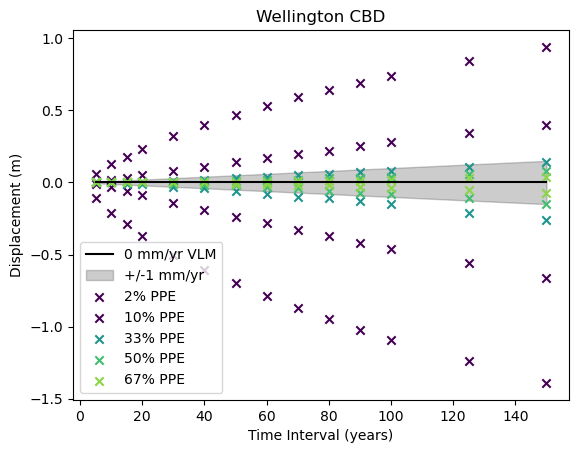

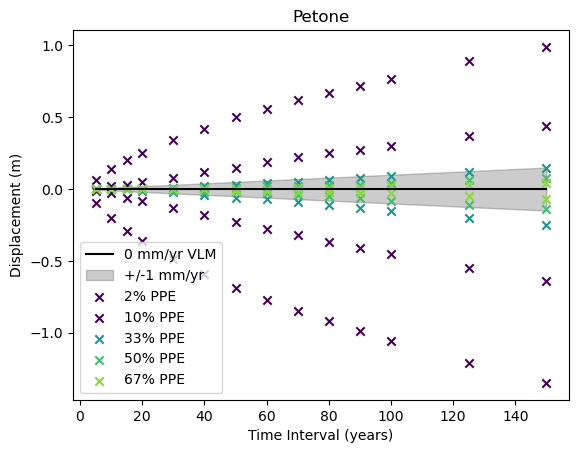

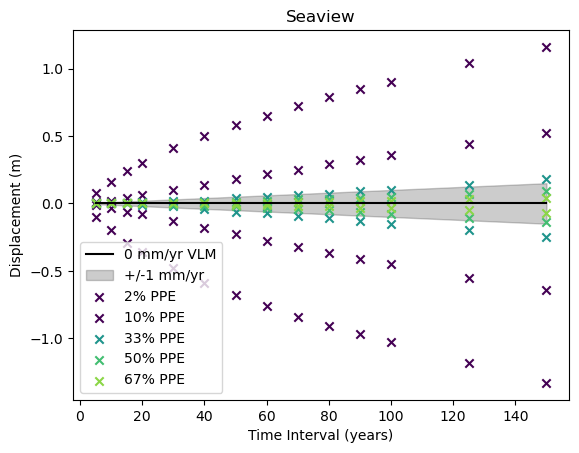

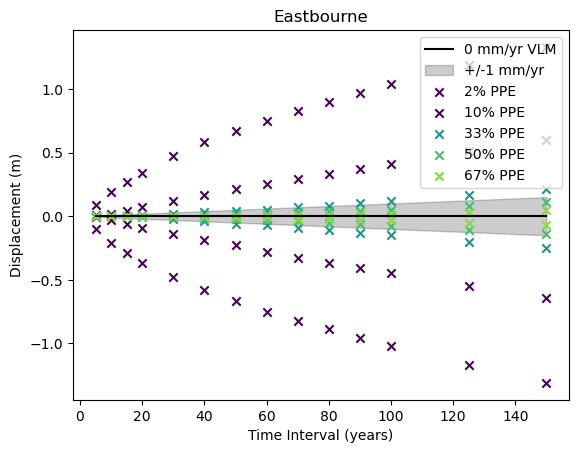

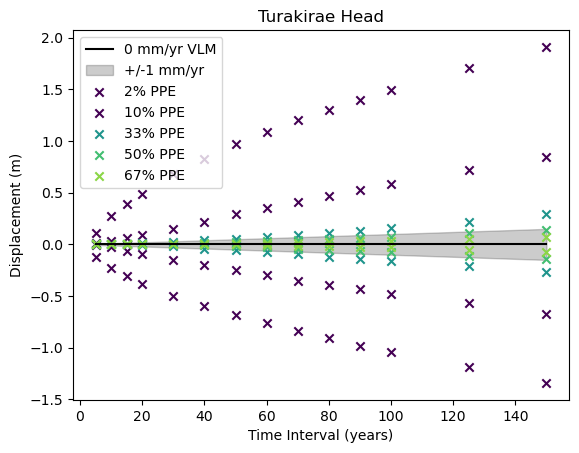

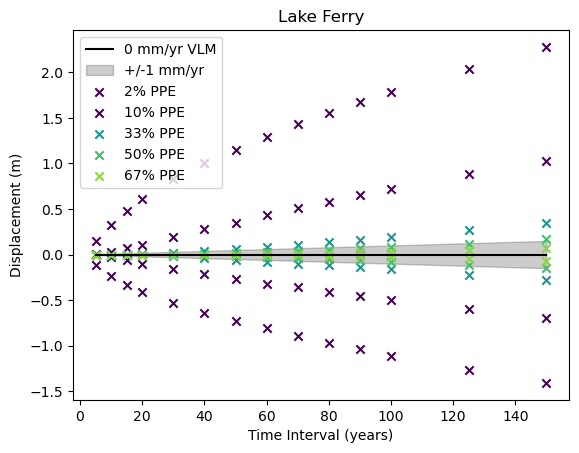

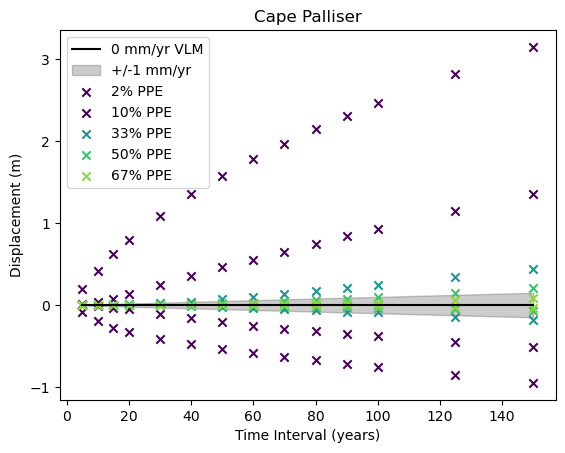

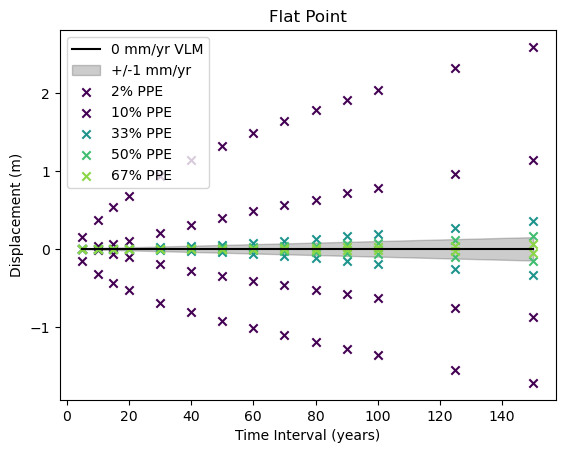

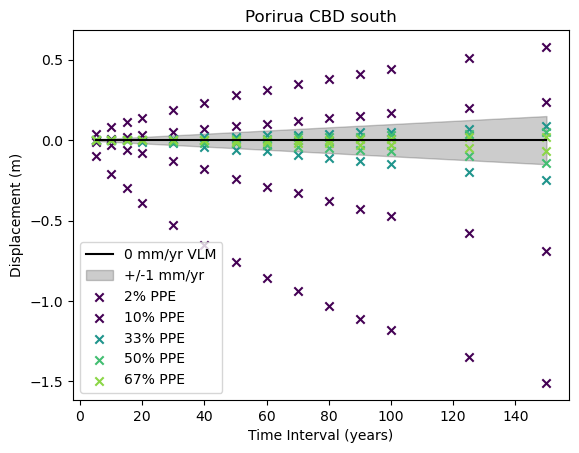

In [18]:
vlm = time_interval * (interseismic_vlm / 1000)
vlm_plus = time_interval * ((interseismic_vlm + interseismic_uc) / 1000)
vlm_minus = time_interval * ((interseismic_vlm - interseismic_uc) / 1000)
for six, site in enumerate(site_list):
    plt.plot(time_interval, vlm, label=f'{interseismic_vlm} mm/yr VLM', color='black', linestyle='-')
    plt.fill_between(time_interval, vlm_plus, vlm_minus, color='black', alpha=0.2, label=f'+/-{interseismic_uc} mm/yr')
    for pix, probability in enumerate(probabilities):
        plt.scatter(time_interval, vlm + ups[pix, :, six], marker='x', color=plt.cm.viridis(np.log10(probability / 10)), label=f'{probability}% PPE')
        plt.scatter(time_interval, vlm + downs[pix, :, six], marker='x', color=plt.cm.viridis(np.log10(probability / 10)))
    plt.xlabel('Time Interval (years)')
    plt.ylabel('Displacement (m)')
    plt.legend()

    plt.title(f'{site}')
    plt.show()

